### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Step 1: Reading and Understanding the Data

In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For Machine learning tasks
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# To display maximum number of rows and columns from the datasets
pd.set_option("display.max_rows",None)  
pd.set_option("display.max_columns",None)  

In [4]:
# Data Loading
bikes = pd.read_csv("day.csv")

In [5]:
# Check the head of the dataset
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bikes.shape

(730, 16)

In [7]:
# concise summary of the DataFrame's structure
bikes.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


-  There are 16 independent variables and there is no missing data.
-  There is only one obeject data type, which is the date column.

In [8]:
# getting the descriptive statistics of all the numerical columns
bikes.describe() 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


-  The target variable for our model is the 'cnt' variable, which is a continuous variable and it has min of 22 count and a maximum of 8714 count.

-------------------------------------------------------

In [9]:
# list of all the column names
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Step 2:  Pre-processing Data

In [10]:
# drop 'instant' column as it is just an index column and is of no significance or use to us for building model
bikes.drop(['instant'] , axis = 1 , inplace =True)  # axis = 1 for column

In [11]:
# drop 'dteday' column as it is date column and we have already been provided with the year, month, and day of the week
bikes.drop(['dteday'] , axis = 1 , inplace = True)

In [12]:
# drop the 'casual' and the 'registered' columns, since we have a combine variable 'cnt'
bikes.drop(['casual' , 'registered'] , axis=1 , inplace = True)

In [13]:
# check dataset 
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
bikes.shape

(730, 12)

-  Now we are left with 12 independent variables

---------------------------------------------

In [15]:
# replace non-binary categorical variables with their original discriptive values

bikes['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'} , inplace = True)

bikes['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'} , inplace = True)

bikes['weekday'].replace({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 0:'Sun'} , inplace = True)

bikes['weathersit'].replace({1:'Clear', 2:'Cloudy', 3:'Heavy rain + snow'} , inplace = True)

In [16]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# missing value check 
bikes.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

-------------------------------

### Step 3: Visualising the Data

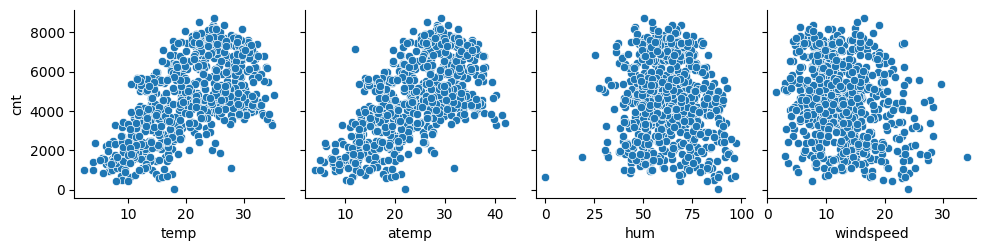

In [18]:
# visualize numerical variables to find correlation
sns.pairplot(data = bikes, x_vars = ['temp','atemp','hum','windspeed'] , y_vars = 'cnt' , kind = 'scatter')
plt.show()

#### Insights:
-  Both temp and atemp have a strong positive correlation with cnt.
-  Humidity (hum) has a weak negative correlation with target variable and has two outliers below 25. 
-  Wind speed (windspeed) also has a negative correlation with 'cnt' variable and has some outliers.

<Axes: xlabel='windspeed'>

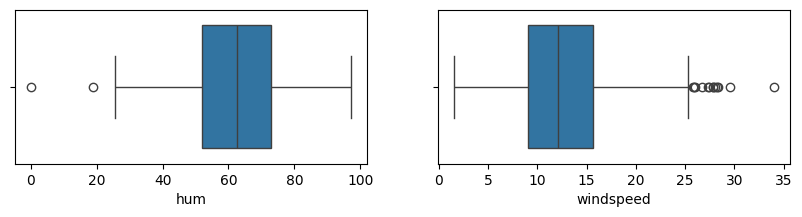

In [19]:
# Handling outliers
plt.figure( figsize = [10,2])
plt.subplot(1,2,1)
sns.boxplot(x='hum', data=bikes)

plt.subplot(1,2,2)
sns.boxplot(x='windspeed', data=bikes)

#### Insights:
-  There are very few outliers in both of the humidity and the windspeed variables, and comparing it with 'cnt' variable, the count of bike rides is also low associated with these outliers, thus it might be plausible that few people might still ride bikes in such conditions.

In [20]:
# checking correlation matrix 
bikes[['temp','atemp','hum','windspeed','cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


#### Insights:
-  We can see a very high correlation coefficient (close to 1) between 'temp' and 'atemp'. 
-  This high correlation indicates that these two variables are highly redundant, i.e they provide very similar information to the model, so we can drop one of them to avoid multicollinearity.

In [21]:
# drop atemp feature
bikes.drop(['atemp'] , axis = 1, inplace = True)

In [22]:
bikes.shape

(730, 11)

In [23]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

---------------------

-  Using boxplots to visualize the relationship between categorical and numerical variables to provide insights into how the predictor variables may influence the target variable 'cnt'.

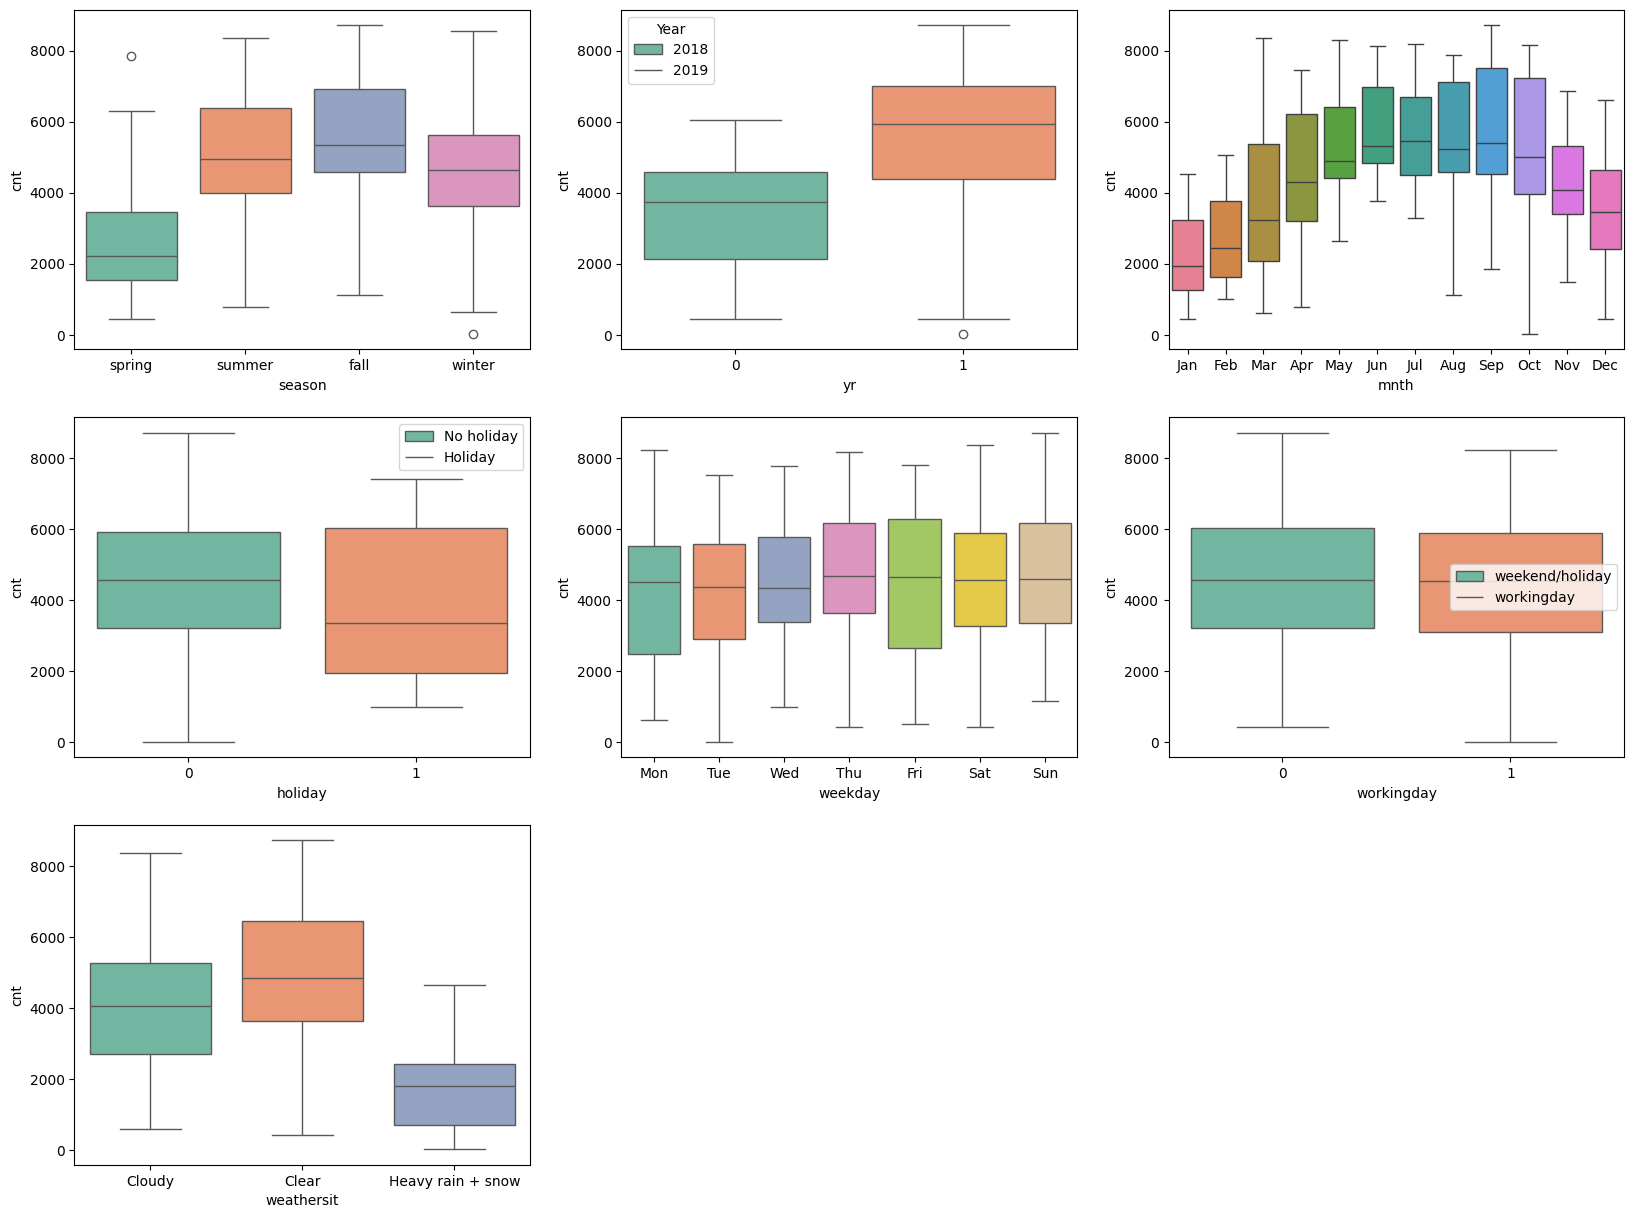

In [24]:
# visualize categorical variables

# set color palette
sns.set_palette("Set2")

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y= 'cnt', data = bikes ,hue='season')

plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y= 'cnt', data = bikes, hue='yr' )
plt.legend(title='Year', labels=['2018', '2019'])

plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y= 'cnt', data = bikes, hue='mnth')

plt.subplot(3,3,4)
sns.boxplot(x= 'holiday', y= 'cnt', data = bikes, hue='holiday')
plt.legend(labels = ['No holiday' , 'Holiday'])

plt.subplot(3,3,5)
sns.boxplot(x='weekday', y = 'cnt', data= bikes, hue='weekday')

plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data= bikes, hue='workingday')
plt.legend(labels = ['weekend/holiday', 'workingday'])

plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y='cnt', data= bikes, hue='weathersit')

plt.show()

#### Insights:
-  For 'season' variable, the highest count is during the 'fall' season and the least count of rental bikes is during the 'spring' season. During the 'summer' and 'winter' season the average count of rental bikes is almost same for both around 5000.
-  For year 2018 the max count of bikes rented was around 6000 whereas for year 2019 it was way above 8000. 
-  Looking at the month variable, the count of rented bikes shows a gradual increase from January.
   August, September, and October have the highest bike rental counts and as we move toward December, there is a noticeable decline in bike rentals.
-  For the 'holiday' variable, the median count of rented bikes is higher on non-holidays compared to holidays suggesting that people tend to rent bikes more frequently on regular days, also the distribution of bike rental counts on holidays has a wider spread.
-  For the 'weekday' variable, for all days the median is little below 5000. Friday has the widest IQR, suggesting that the number of bike rented on Friday varies more widely compared to other days. 
-  For the 'workingday' variable, there is no such significant pattern, demand for bikes services are almost same with an average around 5000 count.
-  For the 'weathersit' variable, least bikes rented or booked was during Heavy Rain or snowy weather condition, most bikes rented were on a clear day. 

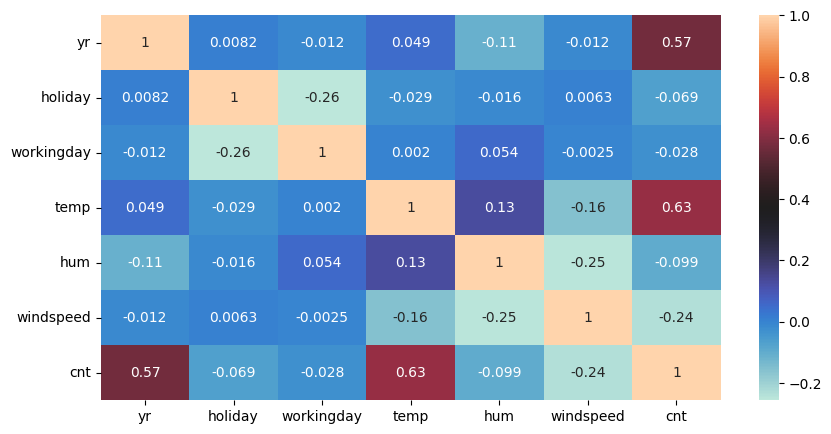

In [25]:
# check correlation between variables

varlist = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt']

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(bikes[varlist].corr(), cmap='icefire', annot=True)
plt.show()

#### Insights:
-  High correlation between 'cnt' i.e target variable with 'temp' variable followed by 'yr'
-  No strong correlation between the predictor variables.

--------------

In [26]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


-  Now we can see, 'season', 'mnth', 'weekday', 'weathersit' column's data type changed to object data type. 
-  We can now create a dummy variables to represent categorical variables as binary indicators.
-  Simultaneously dropping one level (n-1) for n levels to avoid multicollinearity issues.

### Step 4: Data Preparation

In [27]:
# creating a dummy variable
seasons = pd.get_dummies(bikes['season'] , dtype= 'int' , drop_first = True)  

month = pd.get_dummies(bikes['mnth'] , dtype= 'int', drop_first = True)

weekdays = pd.get_dummies(bikes['weekday'] , dtype= 'int', drop_first = True)

weather = pd.get_dummies(bikes['weathersit'] , dtype= 'int', drop_first = True)

Just for reference, after dummy variable encoding:
-  For season variable, 'fall' is the reference category
-  For month variable, 'April' is the reference category
-  For weekdays variable, 'Friday' is the reference category
-  For weather variable, 'clear' is the reference category

In [28]:
# concatenating dummy variables with the original DataFrame
bikes = pd.concat([bikes, seasons, month, weekdays, weather], axis =1) 

In [29]:
# drop the original categorical variables
bikes.drop(['season' , 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)

In [30]:
# check dataset 
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Heavy rain + snow
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
bikes.shape

(730, 29)

### Step 5: Splitting the data into Train and Test Sets

In [32]:
# split into training data and test data

bikes_train , bikes_test = train_test_split(bikes , train_size = 0.7 , random_state = 100)        # setting the seed value

In [33]:
# check shape and size
print(bikes_train.shape)
print(bikes_test.shape)

(510, 29)
(220, 29)


-----------------

### Step 6 : Scaling numerical variables

In [34]:
# using MinMaxScale
scaler = MinMaxScaler()  # create a scaler object

# Apply scaler() to all the columns except the binary ones and 'dummy' variables
num_vars = ['temp','hum','windspeed','cnt']

# Scale the numerical variables in the training dataset
bikes_train[num_vars]  = scaler.fit_transform(bikes_train[num_vars])  

#### Note: 
-  fit_transform() is used on training data, so the scaler learns the parameters needed for scaling and then the scaler applies the learned parameters to transform the data.

In [35]:
bikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Heavy rain + snow
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [36]:
bikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Heavy rain + snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 7: Train the model

In [37]:
# Dividing into X and Y sets for the model building
y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [38]:
X_train.head()  

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Heavy rain + snow
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [39]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

### Step 8: Feature Selection

#### Recursive Feature Elimination (RFE) technique 

In [40]:
# using RFE 

lm = LinearRegression()                                      # creating instance lm to repesent linear regression

lm.fit(X_train, y_train)                                     # fit LR model to training data

rfe = RFE(estimator=lm, n_features_to_select=16)             # selecting 16 features

rfe = rfe.fit(X_train, y_train)                              # fit the RFE model to the training data

In [41]:
# display the list of selected features
list(zip(X_train.columns, rfe.support_, rfe.ranking_ ))  

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 10),
 ('Mar', False, 13),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 6),
 ('Sat', False, 3),
 ('Sun', False, 4),
 ('Thu', False, 12),
 ('Tue', False, 5),
 ('Wed', False, 9),
 ('Cloudy', True, 1),
 ('Heavy rain + snow', True, 1)]

In [42]:
# display names of columns that are selected
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Feb', 'Jan', 'Jul', 'Nov', 'Sep', 'Cloudy',
       'Heavy rain + snow'],
      dtype='object')

In [43]:
# display names of columns which are not selected
X_train.columns[~ rfe.support_]

Index(['workingday', 'Aug', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

#### Using statistical techniques

In [44]:
# include only those features selected by the RFE algorithm
X_train_rfe = X_train[col]

In [45]:
# add constant to ensure the intercept term is included in the subsequent model fitting process
X_train_sm_1 = sm.add_constant(X_train_rfe)  

In [46]:
#fit the model
lm = sm.OLS(y_train , X_train_sm_1).fit()

In [47]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.0
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          2.94e-188
Time:                        23:40:56   Log-Likelihood:                 515.57
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     493   BIC:                            -925.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3313      0.03

#### Insights:
-  Feb month has a very high p-value i.e > 0.05, therefore we need to drop this variable.

In [48]:
# calculate VIF for the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features']  = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.52
2,temp,18.33
5,spring,5.45
4,windspeed,4.73
7,winter,4.07
6,summer,2.82
10,Jan,2.38
14,Cloudy,2.33
0,yr,2.09
9,Feb,1.92


#### Insights:
-  hum predictor variable has very high VIF value, and we have seen it have very weak correlation with the target variable.

In [49]:
# drop feb 
X_train_new_1 = X_train_rfe.drop(['Feb'] , axis =1)

In [50]:
# build model
X_train_sm_2 = sm.add_constant(X_train_new_1)  
lm = sm.OLS(y_train , X_train_sm_2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          8.15e-189
Time:                        23:40:56   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3197      0.03

-  'Dec' month has a high p-value so we need to drop it 

In [51]:
# calculate VIF for the model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features']  = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
13,Cloudy,2.32
0,yr,2.09
11,Nov,1.85
9,Jan,1.75


In [52]:
# drop Dec
X_train_new_2 = X_train_new_1.drop(['Dec'] , axis =1)

# build model
X_train_sm_3 = sm.add_constant(X_train_new_2)  
lm = sm.OLS(y_train , X_train_sm_3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          4.41e-189
Time:                        23:40:56   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3032      0.03

In [53]:
# calculate VIF for the model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features']  = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.09
2,temp,16.80
4,windspeed,4.72
5,spring,4.37
7,winter,3.78
6,summer,2.80
12,Cloudy,2.29
0,yr,2.09
8,Jan,1.67
10,Nov,1.60


In [54]:
# drop nov
X_train_new_3 = X_train_new_2.drop(['Nov'] , axis =1)

# build model
X_train_sm_4 = sm.add_constant(X_train_new_3)  
lm = sm.OLS(y_train , X_train_sm_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          7.59e-190
Time:                        23:40:56   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2964      0.03

In [55]:
# calculate VIF for the model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features']  = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.02
2,temp,16.71
4,windspeed,4.66
5,spring,4.34
7,winter,3.36
6,summer,2.79
11,Cloudy,2.29
0,yr,2.09
8,Jan,1.67
9,Jul,1.59


In [56]:
X_train_new_4 = X_train_new_3.drop(['Jan'] , axis =1)

# build model
X_train_sm_5 = sm.add_constant(X_train_new_4)  
lm = sm.OLS(y_train , X_train_sm_5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          2.95e-190
Time:                        23:40:56   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2848      0.03

In [57]:
# calculate VIF for the model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features']  = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.03
2,temp,16.03
4,windspeed,4.65
5,spring,4.01
7,winter,3.33
6,summer,2.79
10,Cloudy,2.28
0,yr,2.08
8,Jul,1.58
9,Sep,1.38


In [58]:
X_train_new_5 = X_train_new_4.drop(['spring'] , axis =1)
X_train_sm_6 = sm.add_constant(X_train_new_5)  
lm = sm.OLS(y_train , X_train_sm_6).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          6.89e-190
Time:                        23:40:56   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2262      0.02

In [59]:
# calculate VIF for the model
vif = pd.DataFrame()
X = X_train_new_5
vif['Features']  = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.53
2,temp,10.20
4,windspeed,3.56
9,Cloudy,2.11
0,yr,2.02
5,summer,1.77
6,winter,1.70
7,Jul,1.55
8,Sep,1.29
10,Heavy rain + snow,1.16


In [60]:
X_train_new_6 = X_train_new_5.drop(['Jul'] , axis =1)
X_train_sm_7 = sm.add_constant(X_train_new_6)  
lm = sm.OLS(y_train , X_train_sm_7).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.32e-189
Time:                        23:40:57   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2261      0.02

In [61]:
# calculate VIF for the model
vif = pd.DataFrame()
X = X_train_new_6
vif['Features']  = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.25
2,temp,8.01
4,windspeed,3.56
8,Cloudy,2.11
0,yr,2.01
6,winter,1.66
5,summer,1.58
7,Sep,1.21
9,Heavy rain + snow,1.16
1,holiday,1.04


In [62]:
X_train_new_7 = X_train_new_6.drop(['hum'] , axis =1)
X_train_sm_8 = sm.add_constant(X_train_new_7)  
lm = sm.OLS(y_train , X_train_sm_8).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          2.83e-186
Time:                        23:40:57   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1259      0.01

In [63]:
# calculate VIF for the model
vif = pd.DataFrame()
X = X_train_new_7
vif['Features']  = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,summer,1.57
7,Cloudy,1.48
5,winter,1.37
6,Sep,1.20
8,Heavy rain + snow,1.08
1,holiday,1.04


#### Insights:
-  Every variable has zero p-value, and all VIF values of all final independent variables are under 5 indicating no multicollinearity.
-  Approximately 83% of the variance in the dependent variable is explained by the independent variables.
-  Temp has a high coeff, the positive coeff for temp suggests that as temperature increases, bike demand tends to increase. Similarly Heavy rain + snow has a high negative coefficent, indicating decrease in bike demand with increase in weather condition.
-  F-statistic is 271.9 mean that the overall regression model is statistically significant.

In [64]:
print(round(lm.params,3))# check coefficients to conclude hypothesis testing

const                0.126
yr                   0.233
holiday             -0.099
temp                 0.548
windspeed           -0.153
summer               0.088
winter               0.129
Sep                  0.101
Cloudy              -0.078
Heavy rain + snow   -0.283
dtype: float64


### Step 9: Residual Analysis of the train data

In [65]:
# using final training model for prediction
y_train_pred = lm.predict(X_train_sm_8)

In [66]:
# calculate residual
res = y_train - y_train_pred

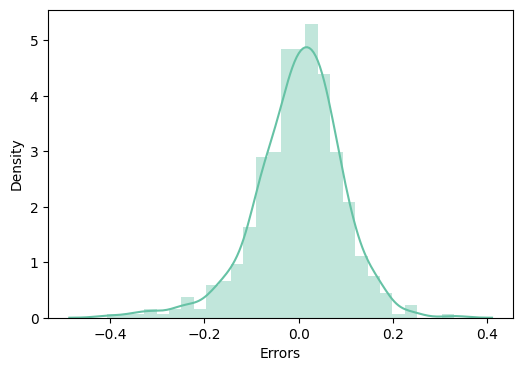

In [67]:
# check if normal distribution and centered around zero i.e with mean=0
plt.figure(figsize = [6,4])
sns.distplot(res)
plt.xlabel('Errors')
plt.show()

### Step 10: Prediction and Evaluation on the Test sets

In [68]:
# Apply scaler() to all the columns except the binary ones and the dummy variables
num_vars = ['temp','hum','windspeed','cnt']

# Scale the numerical variables in the training dataset
bikes_test[num_vars]  = scaler.transform(bikes_test[num_vars])  

In [69]:
bikes_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Heavy rain + snow
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Insights:
-  For the 'Test' sets the max value is not scaled to 1, it is close to 1, because the MinMaxScaler is for the 'Training' set and not the 'Test' set, we just transformed to use those values in the test set

In [70]:
# create X and y
y_test = bikes_test.pop('cnt')

X_test = bikes_test

In [71]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new_7.columns]

X_test_sm = sm.add_constant(X_test_new)


In [72]:
# Make prediction
y_test_pred = lm.predict(X_test_sm)

Text(0, 0.5, 'y_test_pred')

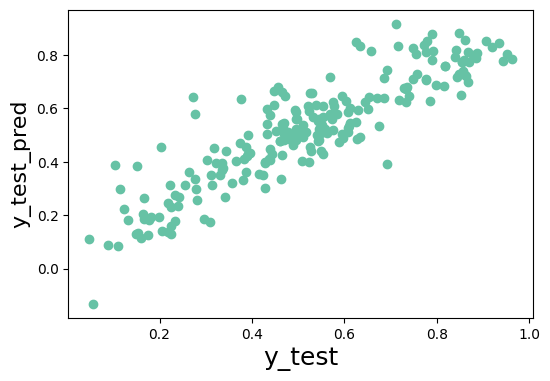

In [73]:
# Model evaluation

# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = [6,4])
plt.scatter(y_test,y_test_pred)
         
plt.xlabel('y_test', fontsize=18)                        
plt.ylabel('y_test_pred', fontsize=16)

#### Insights:
-  It shows linear scatter plot of y_test versus y_test_pred, indicating that the models predictions are in good agreement with the actual values.

In [74]:
print('R-squared of train data', r2_score(y_true = y_train, y_pred = y_train_pred))
print('\n')
print('R-squared of test data', r2_score(y_true = y_test , y_pred = y_test_pred))

R-squared of train data 0.8303450237489229


R-squared of test data 0.7941977535477242


#### Insights:
-  Approximately 83% of the variance in the target variable (bike demand) is explained by the independent variables included in the model. 
-  The R-squared value of 0.79 for the test data indicates that the model explains approximately 79% of the variance in the test set.

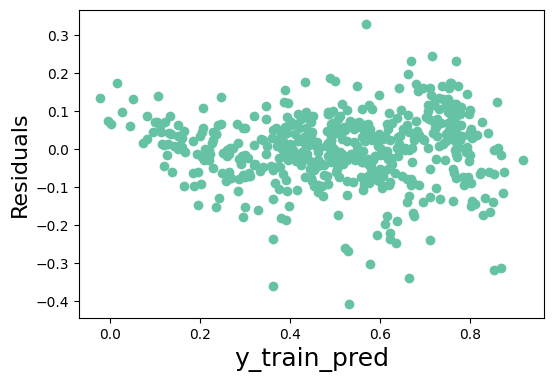

In [75]:
# creating scatter plot to visualize the relationship between y_train_pred and residuals (res) of the training data
plt.figure(figsize=[6,4])
plt.scatter(y_train_pred, res)
plt.xlabel('y_train_pred', fontsize=18)
plt.ylabel('Residuals', fontsize=16)
plt.show()

#### Insights:
-  The spread of residuals appears to be relatively consistent across different levels of predicted values, suggesting that the model’s predictions are reasonably accurate across a range of values.

In [76]:
print(round(lm.params,3))

const                0.126
yr                   0.233
holiday             -0.099
temp                 0.548
windspeed           -0.153
summer               0.088
winter               0.129
Sep                  0.101
Cloudy              -0.078
Heavy rain + snow   -0.283
dtype: float64


#### Equation for best fitted line:
-  cnt = 0.126 + (yr * 0.233) - (holiday * 0.099) + (temp * 0.548) - (windspeed * 0.153) + (summer * 0.088) +(winter * 0.129) + (Sep * 0.101) - (Cloudy * 0.078) - (Heavy rain and snow * 0.283)

#### Top variables:
-  The variables that are significant in predicting the demand for shared bikes, are the 'temp' variable, with a strong positive coefficient of 0.548, that means when temperature increase the demand for bikes also increase.
-  The second significant variable is year, as there is a year by year increase in the bike demand.
-  Heavy rain and snow, weather condition shows a high negative correlation, with coefficient of 0.283, thus with extreme weather condition, the demand of bike decreases.
-  In September month the demand for bikes is relatively higher than compared to the rest of the months. Thus showing bike demand increase in the 'fall' season.